In [1]:
#Machine learning Equations for Decision Trees - Part 19

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
df = pd.DataFrame(X, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
df['label'] = y

In [6]:
data = df.values

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


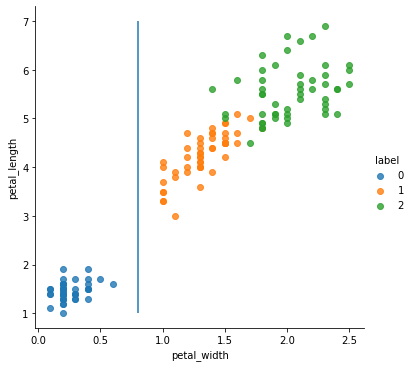

In [8]:
sns.lmplot(data= df, x= 'petal_width', y='petal_length', hue= 'label', fit_reg = False)
plt.vlines(x=0.8, ymin = 1, ymax = 7)

In [9]:
def split_data(data, split_column, split_value):
    split_columns = data[:, split_column]
    data_below = data[split_columns<=split_value]
    data_above = data[split_columns>split_value]
    
    return data_below, data_above

In [10]:
data_below, data_above = split_data(data, 3, 0.8)

In [11]:
data_below

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [12]:
def calculate_entropy(data):
    label_columns = data[:,-1]
    counts = np.unique(label_columns, return_counts = True)[1]
    probability = counts/counts.sum()
    entropy = sum(probability* -np.log2(probability))
    return probability, entropy

In [17]:
entropy, probability = calculate_entropy(data_below)

In [18]:
entropy

array([1.])

In [19]:
probability

0.0

In [20]:
entropy, probability = calculate_entropy(data_above)

In [21]:
entropy

array([0.5, 0.5])

In [22]:
probability

1.0

In [23]:
def calculate_giniindex(data):
    label_columns = data[:, 1]
    counts = np.unique(label_columns, return_counts = True)[1]
    probability = counts/counts.sum()
    GINIIndex = 1 - np.sum(probability**2, axis=0)
    return GINIIndex, probability

In [24]:
GINIIndex, probability = calculate_giniindex(data_below)

In [25]:
GINIIndex

0.9032

In [26]:
probability

array([0.02, 0.02, 0.12, 0.08, 0.1 , 0.04, 0.18, 0.12, 0.06, 0.06, 0.08,
       0.04, 0.02, 0.02, 0.02, 0.02])

In [27]:
GINIIndex, probability = calculate_giniindex(data_above)

In [28]:
GINIIndex

0.8982

In [29]:
probability

array([0.01, 0.03, 0.03, 0.03, 0.08, 0.05, 0.09, 0.14, 0.09, 0.2 , 0.07,
       0.08, 0.04, 0.03, 0.01, 0.02])

In [39]:
Proir_Entropy = lambda x,y: -x/(x+y)*np.log2(x/(x+y)) - y/(x+y)*np.log2(y/(x+y))

In [40]:
Proir_Entropy(2, 3)

0.9709505944546686

In [41]:
Prior_GINIindex = lambda x, y: 1- ((x/(x+y))**2+(y/(x+y))**2)

In [42]:
Prior_GINIindex(2, 3)

0.48

In [43]:
#Entropy for Cough

Result = 2/5*Proir_Entropy(1,1)+3/5*Proir_Entropy(2, 1) # Cough

In [44]:
Information_Gain = Proir_Entropy(2, 3)-Result # Cough

In [45]:
Information_Gain # Cough

0.01997309402197489

In [46]:
#Gini Index for Cough

Result = 2/5*Prior_GINIindex(1,1)+3/5*Prior_GINIindex(2,1) # Cough

In [47]:
Information_Gain = Prior_GINIindex(2,3)-Result # Cough

In [48]:
Information_Gain

0.013333333333333308

In [49]:
#Entropy for Fever

Result = 2/5*Proir_Entropy(2, 0)+3/5*Proir_Entropy(1, 2) #Fever

<ipython-input-39-685fe0fa33ae>:1: RuntimeWarning: divide by zero encountered in log2
  Proir_Entropy = lambda x,y: -x/(x+y)*np.log2(x/(x+y)) - y/(x+y)*np.log2(y/(x+y))
<ipython-input-39-685fe0fa33ae>:1: RuntimeWarning: invalid value encountered in double_scalars
  Proir_Entropy = lambda x,y: -x/(x+y)*np.log2(x/(x+y)) - y/(x+y)*np.log2(y/(x+y))


In [50]:
Result = 3/5*Proir_Entropy(1,2)

In [51]:
Information_Gain = Proir_Entropy(2, 3)-Result #Fever

In [52]:
Information_Gain

0.4199730940219749

In [53]:
#GINI Index for Fever

Result = 2/5*Prior_GINIindex(2,0)+3/5*Prior_GINIindex(1, 2)  #Cough

In [54]:
Information_Gain = Prior_GINIindex(2, 3)-Result #Cough

In [55]:
Information_Gain

0.21333333333333332